In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm

In [2]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

In [10]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=6)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=6)

Files already downloaded and verified
Files already downloaded and verified


In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

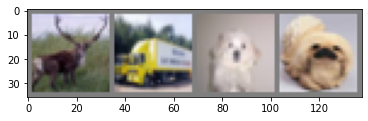

In [12]:
def imshow(img):
    img = img / 2 + 0.5
    nping = img.numpy()
    nping = np.transpose(nping, (1, 2, 0))
    plt.imshow(nping)
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

In [13]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = x.view(-1, 16 * 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

In [24]:
net = Net().to(device)
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=12544, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [19]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [26]:
%%time
for epoch in range(13):
    for i, data in enumerate(trainloader):
        image, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if(i % 1000 == 0):
            print('Epoch: %d, Step: %d, Loss: %.3f' %(epoch, i, loss.item()))

Epoch: 0, Step: 0, Loss: 2.287
Epoch: 0, Step: 1000, Loss: 2.295
Epoch: 0, Step: 2000, Loss: 2.283
Epoch: 0, Step: 3000, Loss: 2.263
Epoch: 0, Step: 4000, Loss: 2.368
Epoch: 0, Step: 5000, Loss: 2.228
Epoch: 0, Step: 6000, Loss: 2.280
Epoch: 0, Step: 7000, Loss: 2.311
Epoch: 0, Step: 8000, Loss: 2.369
Epoch: 0, Step: 9000, Loss: 2.321
Epoch: 0, Step: 10000, Loss: 2.298
Epoch: 0, Step: 11000, Loss: 2.320
Epoch: 0, Step: 12000, Loss: 2.274
Epoch: 1, Step: 0, Loss: 2.230
Epoch: 1, Step: 1000, Loss: 2.323
Epoch: 1, Step: 2000, Loss: 2.235
Epoch: 1, Step: 3000, Loss: 2.314
Epoch: 1, Step: 4000, Loss: 2.269
Epoch: 1, Step: 5000, Loss: 2.326
Epoch: 1, Step: 6000, Loss: 2.331
Epoch: 1, Step: 7000, Loss: 2.363
Epoch: 1, Step: 8000, Loss: 2.302
Epoch: 1, Step: 9000, Loss: 2.250
Epoch: 1, Step: 10000, Loss: 2.326
Epoch: 1, Step: 11000, Loss: 2.331
Epoch: 1, Step: 12000, Loss: 2.326
Epoch: 2, Step: 0, Loss: 2.327
Epoch: 2, Step: 1000, Loss: 2.320
Epoch: 2, Step: 2000, Loss: 2.340
Epoch: 2, Step: 3

KeyboardInterrupt: 

In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0
